In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import os

os.chdir("..")
import legacy_code.fast_mfcf_fixed4 as legacy_fast_mfcf

from fast_fast_mfcf import MFCF
from fast_fast_mfcf import mfcf_control


In [2]:
def get_time(size, ctl):
    random_matrix = np.random.rand(size, size)
    # Make it symmetric by averaging with its transpose
    W = (random_matrix + random_matrix.T) / 2

    start = time.time()
    _ = MFCF().fast_mfcf(W, ctl, "sumsquares")
    mfcf_time = time.time() - start
    print(f"Optimised mfcf took {mfcf_time} seconds")

    start = time.time()
    gain_function = legacy_fast_mfcf.sumsquares_gen
    _ = legacy_fast_mfcf.fast_mfcf(W, ctl, gain_function)
    legacy_mfcf_time = time.time() - start
    print(f"Legacy mfcf took {legacy_mfcf_time} seconds")

    return legacy_mfcf_time, mfcf_time

def run(ctl, test_sizes):
    result = []
    for size in test_sizes:
        legacy_mfcf_average, mfcf_average = 0, 0
        for _ in range(3):
            legacy_mfcf_time, mfcf_time = get_time(size, ctl)
            legacy_mfcf_average += legacy_mfcf_time
            mfcf_average += mfcf_time

        legacy_mfcf_average /= 3
        mfcf_average /= 3
        result.append([size, legacy_mfcf_average, mfcf_average])
        print(f"Size {size} done with averages: Legacy {legacy_mfcf_average}, Optimised {mfcf_average}")
    return np.array(result)

In [3]:
def plot(result, title, log=False):
    plt.plot(result[:, 0], result[:, 1], label='Legacy Version')
    plt.plot(result[:, 0], result[:, 2], label='Optimised Version')
    plt.title(title)
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.xlabel('Number of vertices')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Compare TMFG generation speed

In [4]:
ctl = mfcf_control()
ctl['threshold'] = 0.00
ctl['drop_sep'] = True
ctl['min_clique_size'] = 4
ctl['max_clique_size'] = 4
ctl['method'] = 'TMFG'

test_sizes = [i * 10 for i in range(1, 20)]
result = run(ctl, test_sizes)

Optimised mfcf took 0.002440929412841797 seconds
Legacy mfcf took 0.0016529560089111328 seconds
Optimised mfcf took 0.0006120204925537109 seconds
Legacy mfcf took 0.000823974609375 seconds
Optimised mfcf took 0.0005970001220703125 seconds
Legacy mfcf took 0.0007839202880859375 seconds
Optimised mfcf took 0.003606081008911133 seconds
Legacy mfcf took 0.004561901092529297 seconds
Optimised mfcf took 0.003092050552368164 seconds
Legacy mfcf took 0.004492044448852539 seconds
Optimised mfcf took 0.003108978271484375 seconds
Legacy mfcf took 0.0045549869537353516 seconds
Optimised mfcf took 0.0076711177825927734 seconds
Legacy mfcf took 0.013637065887451172 seconds
Optimised mfcf took 0.00801992416381836 seconds
Legacy mfcf took 0.013583898544311523 seconds
Optimised mfcf took 0.007714748382568359 seconds
Legacy mfcf took 0.013191938400268555 seconds
Optimised mfcf took 0.014526844024658203 seconds
Legacy mfcf took 0.02884697914123535 seconds
Optimised mfcf took 0.013754129409790039 seconds


#### Normal scale

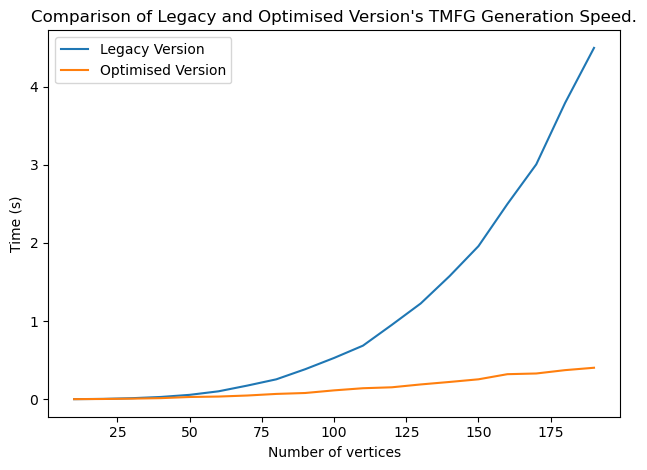

In [5]:
plot(result, "Comparison of Legacy and Optimised Version's TMFG Generation Speed.")

#### Log scale

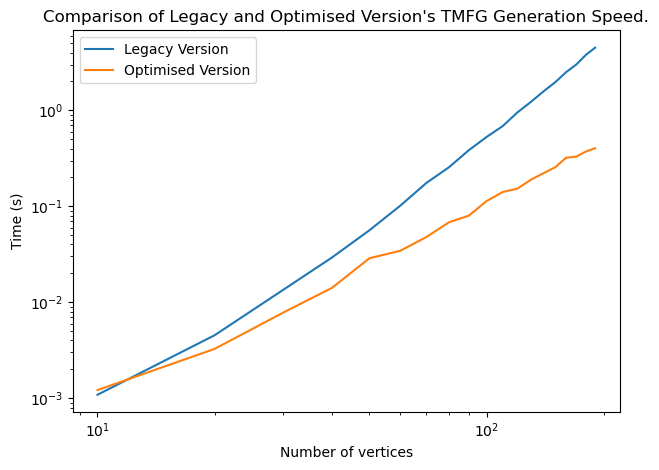

In [6]:
plot(result, "Comparison of Legacy and Optimised Version's TMFG Generation Speed.", log=True)

### Compare MFCF(4, 15) generation speed

In [ ]:
ctl = mfcf_control()
ctl['threshold'] = 0.00
ctl['drop_sep'] = True
ctl['min_clique_size'] = 4
ctl['max_clique_size'] = 15
ctl['method'] = 'TMFG'

test_sizes = [i * 10 for i in range(1, 20)]
result = run(ctl, test_sizes)